In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 

warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("heart.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
x=df.drop('target', axis=1)
y=df['target']

In [11]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=1)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((717, 13), (308, 13), (717,), (308,))

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model= DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

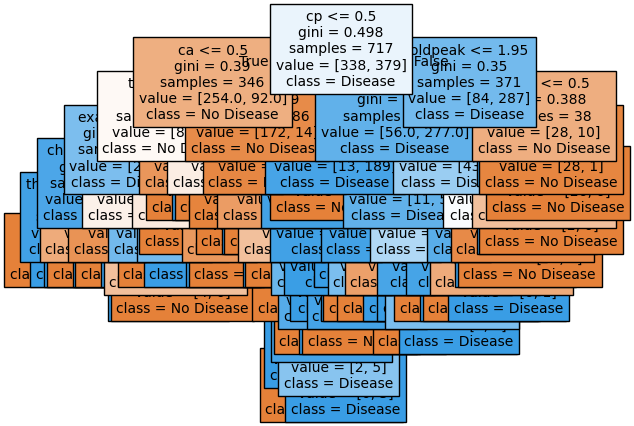

In [17]:
plt.Figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    fontsize=10
)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
y_train_pred= model.predict(x_train)
y_test_pred=model.predict(x_test)

In [19]:
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 1.0
Test Accuracy: 0.9902597402597403


In [20]:
#this model is overfitted control overfitting by controlling depth

pruned_tree= DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

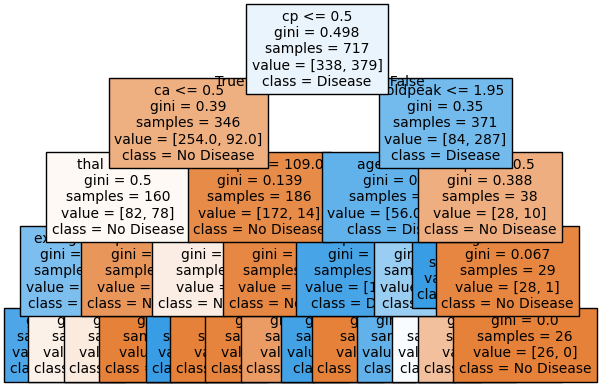

In [21]:
plt.Figure(figsize=(20,10))
plot_tree(
    pruned_tree,
    feature_names=x.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    fontsize=10
)
plt.show()

In [26]:
train_acc_pruned = accuracy_score(y_train, pruned_tree.predict(x_train))
test_acc_pruned = accuracy_score(y_test, pruned_tree.predict(x_test))

In [27]:
print("Train Accuracy:", train_acc_pruned)
print("Test Accuracy:", test_acc_pruned)

Train Accuracy: 0.8702928870292888
Test Accuracy: 0.8311688311688312


In [28]:
#train random forest and compare accuracy

from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
y_pred=rf_model.fit(x_train,y_train)

In [29]:
y_pred

RandomForestClassifier(max_depth=5, random_state=42)

In [31]:
train_rf_acc= accuracy_score(y_train,rf_model.predict(x_train))
test_rf_acc= accuracy_score(y_test, rf_model.predict(x_test))

In [32]:
print("Train Accuracy:", train_rf_acc)
print("Test Accuracy:", test_rf_acc)

Train Accuracy: 0.9330543933054394
Test Accuracy: 0.8993506493506493


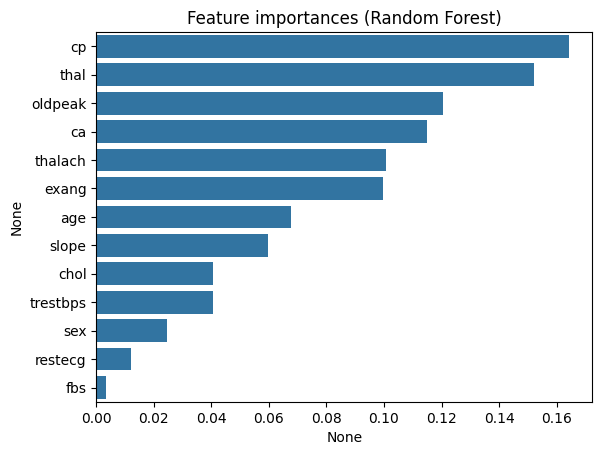

In [34]:
#Interpret feature importances.

importances= pd.Series(
    rf_model.feature_importances_,
    index=x.columns,
).sort_values(ascending=False)

plt.Figure(figsize=(10,20))
sns.barplot(x=importances,y=importances.index)
plt.title("Feature importances (Random Forest)")
plt.show()

In [ ]:
#Interpretation:

#Top features contribute most to predictions.

#Helps understand which factors (e.g., thal, cp, ca) are most relevant.

In [35]:
#Evaluate Using Cross-Validation

from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(rf_model, x, y, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy Mean:", cv_score.mean())
print("Cross-Validation Accuracy Std Dev:", cv_score.std())

Cross-Validation Accuracy Mean: 0.9297560975609755
Cross-Validation Accuracy Std Dev: 0.02646762920244004


In [ ]:
 #Summary of Results
#Model	                       Train Accuracy	  Test Accuracy	  CV Mean Accuracy
#Decision Tree (unpruned)	        ~1.0	        Lower	      (optional)
#Decision Tree (max_depth=4)	     Improved	   Improved	       (optional)
#Random Forest	                     High	        High	        Best